In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Data: Daily Customer Arrivals
arrivals = np.array([8, 12, 10, 15, 9, 13, 11, 14, 7, 16,
                     10, 12, 9, 15, 11, 13, 14, 8, 12, 10])

In [3]:
# 1. Basic Statistics
mean_arrivals = np.mean(arrivals)
pop_var = np.var(arrivals, ddof=0)  # population variance (divide by N)
samp_var = np.var(arrivals, ddof=1)  # sample variance (divide by N-1)
std_arrivals = np.sqrt(samp_var)

print("1. Basic Statistics:")
print(f"Mean: {mean_arrivals:.2f}")
print(f"Population Variance (ddof=0): {pop_var:.4f}")
print(f"Sample Variance (ddof=1): {samp_var:.4f}")
print(f"Standard Deviation (sample): {std_arrivals:.4f}")

print("\nExplanation:")
print("Population variance divides by N and measures variance of entire population.")
print("Sample variance divides by N-1 and is an unbiased estimator for population variance when sample is drawn from a larger population.")


1. Basic Statistics:
Mean: 11.45
Population Variance (ddof=0): 6.3475
Sample Variance (ddof=1): 6.6816
Standard Deviation (sample): 2.5849

Explanation:
Population variance divides by N and measures variance of entire population.
Sample variance divides by N-1 and is an unbiased estimator for population variance when sample is drawn from a larger population.


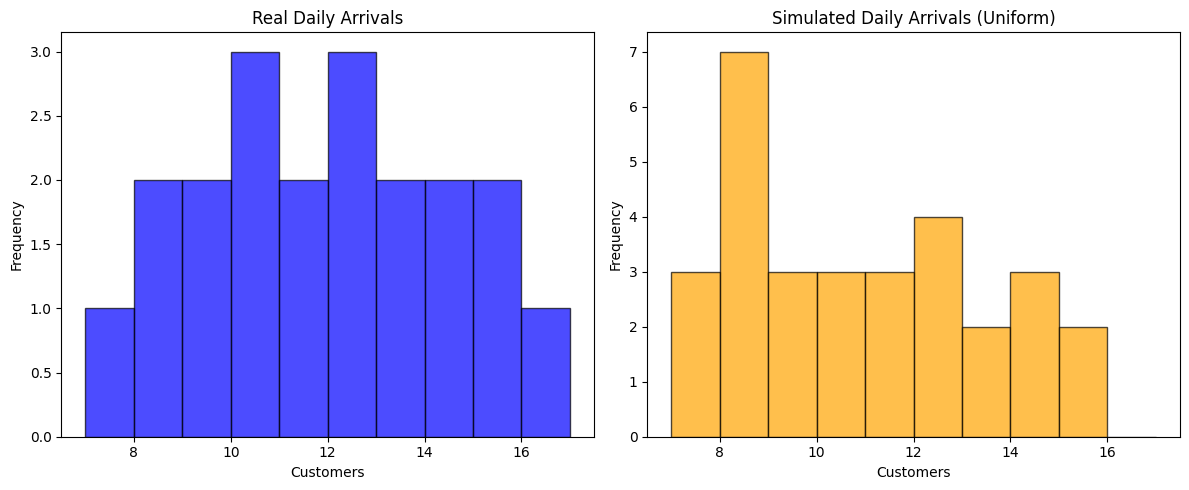

In [4]:
# 2. Random Number Generation - Uniform Distribution assumption
np.random.seed(42)
# Uniform distribution parameters estimated from data:
# min and max observed arrivals
min_arrival = arrivals.min()
max_arrival = arrivals.max()
simulated_arrivals = np.random.uniform(min_arrival, max_arrival, 30)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(arrivals, bins=range(min_arrival, max_arrival+2), alpha=0.7, color='blue', edgecolor='black')
plt.title('Real Daily Arrivals')
plt.xlabel('Customers')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(simulated_arrivals, bins=range(min_arrival, max_arrival+2), alpha=0.7, color='orange', edgecolor='black')
plt.title('Simulated Daily Arrivals (Uniform)')
plt.xlabel('Customers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
# 3. Monte Carlo Simulation: Probability more than 15 customers arrive
sim_100k = np.random.uniform(min_arrival, max_arrival, 100000)
prob_more_15 = np.mean(sim_100k > 15)

print(f"\n3. Monte Carlo Simulation:")
print(f"Estimated Probability P(Arrivals > 15): {prob_more_15:.4f}")



3. Monte Carlo Simulation:
Estimated Probability P(Arrivals > 15): 0.1095



4. Hypothesis Testing:
Personalized hypothesized mean = 10
t-statistic = 2.5087
p-value = 0.0213
Reject the null hypothesis at the 0.05 significance level.


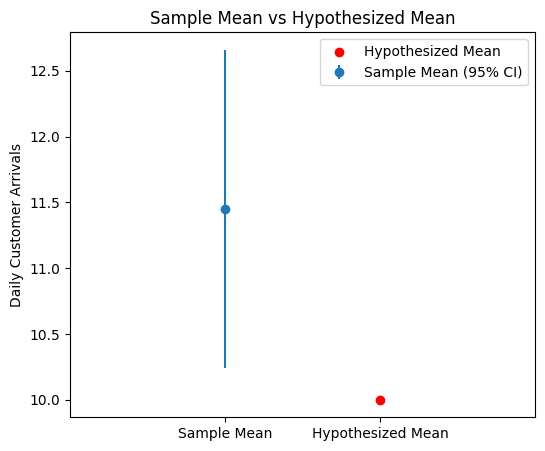


Unique Interpretation:
The t-test evaluates if the observed average daily arrivals differ significantly from your personalized hypothesized mean.
Rejecting H0 means there is statistical evidence the average daily arrivals are not equal to your hypothesized mean.
Failing to reject H0 means there is insufficient evidence to conclude a difference.


In [7]:
# 4. Hypothesis Testing
# Your personalized hypothesized mean:
student_id_last3 = 120  # Replace with your actual last 3 digits
hyp_mean = (student_id_last3 % 10) + 10

print(f"\n4. Hypothesis Testing:")
print(f"Personalized hypothesized mean = {hyp_mean}")

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(arrivals, hyp_mean)

print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis at the 0.05 significance level."
else:
    conclusion = "Fail to reject the null hypothesis at the 0.05 significance level."

print(conclusion)

# Visualization: sample mean vs hypothesized mean with 95% CI
n = len(arrivals)
se = std_arrivals / np.sqrt(n)
margin = stats.t.ppf(1 - alpha/2, n - 1) * se
ci_lower = mean_arrivals - margin
ci_upper = mean_arrivals + margin

plt.figure(figsize=(6,5))
plt.errorbar(1, mean_arrivals, yerr=[[mean_arrivals - ci_lower], [ci_upper - mean_arrivals]], fmt='o', label='Sample Mean (95% CI)')
plt.scatter(1.5, hyp_mean, color='red', label='Hypothesized Mean')
plt.xlim(0.5, 2)
plt.xticks([1, 1.5], ['Sample Mean', 'Hypothesized Mean'])
plt.ylabel('Daily Customer Arrivals')
plt.title('Sample Mean vs Hypothesized Mean')
plt.legend()
plt.show()

print("\nUnique Interpretation:")
print("The t-test evaluates if the observed average daily arrivals differ significantly from your personalized hypothesized mean.")
print("Rejecting H0 means there is statistical evidence the average daily arrivals are not equal to your hypothesized mean.")
print("Failing to reject H0 means there is insufficient evidence to conclude a difference.")
